# Machine Learning

In this homework we will gain experience on Applied Machine Learning, exploring an interesting dataset about soccer players and referees. 

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
pd.options.mode.chained_assignment = None  # default='warn'
import sklearn as sk
from sklearn import preprocessing, ensemble
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

/Users/peco/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("CrowdstormingDataJuly1st.csv")

## 1. Data cleaning and exploration

Describe the data

In [3]:
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


Is there any null data in the dataframe ? Where ?

In [4]:
df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID           True
rater1            True
rater2            True
refNum           False
refCountry       False
Alpha_3           True
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
dtype: bool

We can see that some data are missing, and this is especially the case for *rater1* and *rater2*. We will drop the rows where some data are missing.

In [5]:
df.count()
df = df.dropna()
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,1.154570e+05,1.154570e+05,115457.000000,1.154570e+05,115457.000000
mean,182.176135,76.517413,3.033761,1.371506,0.721134,0.941121,0.360351,0.404592,0.012290,0.012801,0.261946,0.300796,1532.497363,29.367124,0.348564,1.772543e+04,6.292873e-04,0.466222,1.837261e+04,0.002993
std,6.855077,7.187210,3.641059,1.918978,1.155027,1.433641,0.960867,0.831051,0.112127,0.114175,0.294666,0.291061,916.310481,27.981717,0.032004,1.260788e+05,4.801956e-03,0.219350,1.295339e+05,0.019733
min,161.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,178.000000,72.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.335967,1.897000e+03,0.000225
50%,183.000000,76.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1579.000000,15.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2337.000000,45.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


### Aggregation of the data
The data is actually organized as [dyad](http://en.wikipedia.org/wiki/Dyad_(sociology).

We will aggregate the data by players.

**Assumptions** :
    - clubs do not change as it is over 1 season.
    - position does not change as it is over 1 season.

We need to keep only players information, not referee information. We will hence **drop** information that is linked to the referees, or that are useless for the rest of the analysis:
    - refNum     (belongs to referee)
    - refCountry (belongs to referee)
    - playerShort (useless)
    - player
    - photoID
    
there are still variables that are linked to the referees, we will deal with it later.

In [6]:
df['playerShort'].value_counts()

djibril-cisse           202
john-arne-riise         197
javier-saviola          196
giorgios-karagounis     195
xavi                    188
helder-postiga          183
zlatan-ibrahimovic      181
rafael-van-der-vaart    181
simao                   180
timmy-simons            177
emre-beloezoglu         175
david-rozehnal          175
nelson-valdez           175
emanuel-pogatetz        174
iker-casillas           173
shay-given              172
marchena                171
claudio-pizarro         170
anatoliy-tymoshchuk     170
gabriel-tamas           169
andreas-ivanschitz      169
ludovic-giuly           167
william-gallas          167
mark-schwarzer          166
aaron-hughes            166
gerald-asamoah          164
obafemi-martins         164
pepe-reina              164
xabi-alonso             163
roque-santa-cruz        163
                       ... 
knowledge-musona         23
pina                     23
marcelo_5                22
raul-rodriguez_2         21
sergio-alvarez_3    

In [7]:
df_p = df.groupby('playerShort', as_index=False,sort=True)
aggregation = {'club':'max','leagueCountry':'max','birthday':'max','height':'mean','weight':'mean', 
               'position':'max','games':'sum','victories':'sum','ties':'sum','defeats':'sum','goals':'sum',
               'rater1':'mean','rater2':'mean','yellowCards':'sum','redCards':'sum','meanIAT':'mean','nIAT':'sum','seIAT':'mean',
               'meanExp':'mean','nExp':'sum','seExp':'mean'
              }
df_p = df_p.agg(aggregation)
df_p.drop(['playerShort'],inplace=True,axis=1,errors='ignore')
df_p.describe()

,nIAT,meanExp,seIAT,meanIAT,games,defeats,nExp,redCards,ties,weight,rater2,seExp,yellowCards,goals,victories,rater1,height
count,1.419000e+03,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1.419000e+03,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,1.442231e+06,0.465867,0.000595,0.348873,246.842142,76.574348,1.494888e+06,1.041579,58.675123,76.267089,0.304087,0.002799,32.919662,29.319944,111.592671,0.261452,182.163495
std,2.650281e+06,0.092733,0.000952,0.012837,141.256408,40.349871,2.728862e+06,1.372341,33.632432,7.104389,0.292612,0.004342,25.230962,42.998858,78.283708,0.293622,6.799365
min,1.451000e+03,-0.108731,0.000010,0.268981,1.000000,0.000000,1.501000e+03,0.000000,0.000000,55.000000,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,161.000000
25%,2.658230e+05,0.391028,0.000228,0.339204,144.000000,48.000000,2.785795e+05,0.000000,34.000000,71.000000,0.000000,0.001002,15.000000,4.000000,59.000000,0.000000,178.000000
50%,6.167860e+05,0.459111,0.000332,0.347150,223.000000,72.000000,6.397130e+05,1.000000,53.000000,76.000000,0.250000,0.001546,27.000000,14.000000,91.000000,0.250000,183.000000
75%,1.972198e+06,0.541240,0.000585,0.357972,330.000000,100.000000,2.063837e+06,2.000000,79.000000,81.000000,0.500000,0.002919,45.000000,37.000000,147.000000,0.250000,187.000000
max,3.869465e+07,1.031407,0.019879,0.396512,914.000000,258.000000,3.976710e+07,13.000000,197.000000,100.000000,1.000000,0.097267,197.000000,420.000000,527.000000,1.000000,203.000000


In [8]:
df_p.head()

,nIAT,meanExp,seIAT,meanIAT,games,defeats,nExp,redCards,birthday,ties,...,rater2,club,position,seExp,leagueCountry,yellowCards,goals,victories,rater1,height
0,3271886.0,0.494575,0.000652,0.346459,654,228,3425788.0,0,08.11.1979,179,...,0.00,Fulham FC,Center Back,0.004065,England,19,9,247,0.25,182.0
1,2584325.0,0.449220,0.000219,0.348818,336,122,2659581.0,1,04.09.1986,73,...,0.25,Werder Bremen,Attacking Midfielder,0.000993,Germany,42,62,141,0.00,183.0
2,2144721.0,0.491482,0.000367,0.345893,412,115,2246113.0,0,16.04.1987,97,...,0.25,Tottenham Hotspur,Right Midfielder,0.002032,England,11,31,200,0.25,165.0
3,3981726.0,0.514693,0.003334,0.346821,260,68,4130878.0,1,26.12.1990,42,...,0.00,Arsenal FC,Center Midfielder,0.013522,England,31,39,150,0.00,178.0
4,104797.0,0.335587,0.001488,0.331600,124,43,109292.0,2,17.03.1990,40,...,0.25,Montpellier HSC,Center Back,0.005296,France,8,1,41,0.25,180.0


Distribution of skin color. There are 2 indicators for the skin color : *rater1* and *rater2*. Let's have a look at them

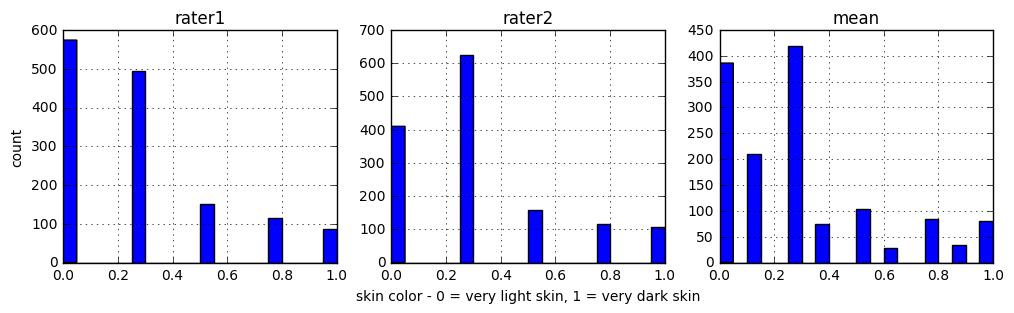

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 3))
df_p['rater1'].hist(ax=ax[0], bins=20)
ax[0].set_ylabel('count')
ax[0].set_title('rater1')

df_p['rater2'].hist(ax=ax[1], bins=20)
ax[1].set_xlabel('skin color - 0 = very light skin, 1 = very dark skin')
ax[1].set_title('rater2')

#mean
mean_rater = (df_p['rater2'] + df_p['rater1'])/2
(mean_rater).hist(ax=ax[2], bins=20)
ax[2].set_title('mean')


How many different values are there in rater1, rater2 and mean ?

In [10]:
values_rater1 = sorted(df_p['rater1'].unique())
print('rater1')
print(values_rater1)
print(len(values_rater1))

values_rater2 = sorted(df_p['rater2'].unique())
print('rater2')
print(values_rater2)
print(len(values_rater2))

value_mean_rater = sorted(mean_rater.unique())
print('mean of rater 1 and rater 2')
print(value_mean_rater)
print(len(value_mean_rater))

rater1
[0.0, 0.25, 0.5, 0.75, 1.0]
5
rater2
[0.0, 0.25, 0.5, 0.75, 1.0]
5
mean of rater 1 and rater 2
[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
9


Let's create a new column with the mean values of *rater1* and *rater2*

In [11]:
df_p['mean_rater'] = mean_rater
df_p.drop(['rater1','rater2'],inplace=True,axis=1,errors='ignore')

#### Drop columns
Maybe we can drop columns about the referees :
    - meanIAT
    - nIAT
    - seIAT
    - meanExp
    - nExp
    - seExp
    

In [12]:
df_p.drop(['meanIAT','nIAT','seIAT','meanExp','nExp','seExp'],inplace=True,axis=1,errors='ignore')

## Machine Learning

blabla

### Preparation of the data
First let's create a vector *X* of features and samples, and a vector *Y* of the labels corresponding. Y will have the value of *mean_rater*

In [13]:
df_y = df_p['mean_rater']
df_x = df_p
df_x.drop(['mean_rater'],inplace=True,axis=1,errors='ignore')
df_x.head()

,games,defeats,redCards,birthday,ties,weight,club,position,leagueCountry,yellowCards,goals,victories,height
0,654,228,0,08.11.1979,179,71.0,Fulham FC,Center Back,England,19,9,247,182.0
1,336,122,1,04.09.1986,73,73.0,Werder Bremen,Attacking Midfielder,Germany,42,62,141,183.0
2,412,115,0,16.04.1987,97,63.0,Tottenham Hotspur,Right Midfielder,England,11,31,200,165.0
3,260,68,1,26.12.1990,42,76.0,Arsenal FC,Center Midfielder,England,31,39,150,178.0
4,124,43,2,17.03.1990,40,73.0,Montpellier HSC,Center Back,France,8,1,41,180.0


#### Normalize and scale the data

In [14]:
#df_x['nIAT'] = preprocessing.scale(df_x['nIAT'])
#df_x['seIAT'] = preprocessing.scale(df_x['seIAT'])
#df_x['nExp'] = preprocessing.scale(df_x['nExp'])
#df_x['seExp'] = preprocessing.scale(df_x['seExp'])


#### Manage categorical data
We transform categorical data in numerical data

In [15]:
def changeNumtoCategorical(xt):
    xtt = []
    for x in xt:
        le = preprocessing.LabelEncoder()
        le.fit(x) 
        y = le.transform(x)
        xtt.append(y)
    return xtt

[df_x['club'],df_x['leagueCountry'],df_x['position']] = changeNumtoCategorical([df_x['club'],df_x['leagueCountry'],df_x['position']])
df_x.head()

,games,defeats,redCards,birthday,ties,weight,club,position,leagueCountry,yellowCards,goals,victories,height
0,654,228,0,08.11.1979,179,71.0,33,1,0,19,9,247,182.0
1,336,122,1,04.09.1986,73,73.0,86,0,2,42,62,141,183.0
2,412,115,0,16.04.1987,97,63.0,79,10,0,11,31,200,165.0
3,260,68,1,26.12.1990,42,76.0,6,3,0,31,39,150,178.0
4,124,43,2,17.03.1990,40,73.0,48,1,1,8,1,41,180.0


#### Manage date data
We will separate the data string into 3 columns.
(We will keep only the months and the year, and create two new columns.) *à voir*

In [16]:
df_x['birthday_day'] = df_x['birthday'].str.split('.',expand=True)[0]
df_x['birthday_month'] = df_x['birthday'].str.split('.',expand=True)[1]
df_x['birthday_year'] = df_x['birthday'].str.split('.',expand=True)[2]
df_x.drop(['birthday'],inplace=True,axis=1,errors='ignore')

### Division of the dataset in train/test datasets
we will use a training set containing 80% of the data, and a testing set containing 20% of the data

when specifying *random_state = 0*, we make sure that the splitting is done everytime at the same place. We can remove this option to have a random splitting.

In [17]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=.2, random_state = 0)
df_y_test = np.asarray(df_y_test, dtype="|S6")
df_y_train = np.asarray(df_y_train, dtype="|S6")

df_x_train.shape, df_y_train.shape, df_x_test.shape, df_y_test.shape



((1135, 15), (1135,), (284, 15), (284,))

In [18]:
# TRAIN RANDOM FOREST

# Train model
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=250,max_depth=40)
rand_forest_model.fit(df_x_train,df_y_train)

# Predict from model neigh
y_pred = rand_forest_model.predict(df_x_test)

# Compute accuracy 
accuracy_rand_forest = sk.metrics.accuracy_score(df_y_test,y_pred)

# Print accuracy and exectution time
print(accuracy_rand_forest)

0.292253521127


### Cross validation

we will define K = 20 folds.


In [19]:
Image(url= "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/84f03ae1d048482471f2a9ca85b0c649730cc269/images/07_cross_validation_diagram.png")

In [20]:
num_folds = 10

Choices for the number of estimators hyperparameter:

In [21]:
#n_estimators_choices = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
n_estimators_choices = [200,  250, 300, 350, 400, 450]
depth_choices = [20, 25,  30, 35, 40, 45]

num_n_estimators = len(n_estimators_choices)
num_depth = len(depth_choices)

In [22]:
accuracy_tab = np.zeros([num_folds,num_n_estimators])

rf_scores = []
rf_param = []

#Loop for 1st hyperparameter n_estimators
for n_estimators_choices_idx, n_estimators_choices_value in enumerate(n_estimators_choices):
    print('.n_estimators_choices_idx : ',n_estimators_choices_idx+1,'/',num_n_estimators)
    
    #Loop for 2nd hyperparameter max_depth
    for depth_choices_idx, depth_choices_value in enumerate(depth_choices):
        print('..depth_choices_idx : ',depth_choices_idx+1,'/',num_depth)
        
        # Random forest
        rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=n_estimators_choices_value,max_depth=depth_choices_value)
        
        #Scores
        scores = cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=num_folds, scoring='accuracy')
        rf_scores.append(scores.mean())
        rf_param.append([n_estimators_choices_value,depth_choices_value])
        print(scores.mean())


.n_estimators_choices_idx :  1 / 6
..depth_choices_idx :  1 / 6
0.313008076282
..depth_choices_idx :  2 / 6
0.314760862153
..depth_choices_idx :  3 / 6
0.299820252805
..depth_choices_idx :  4 / 6
0.297484176763
..depth_choices_idx :  5 / 6
0.323662108976
..depth_choices_idx :  6 / 6
0.320229493539
.n_estimators_choices_idx :  2 / 6
..depth_choices_idx :  1 / 6
0.307983009857
..depth_choices_idx :  2 / 6
0.311568506739
..depth_choices_idx :  3 / 6
0.312100660216
..depth_choices_idx :  4 / 6
0.307967064708
..depth_choices_idx :  5 / 6
0.310686764904
..depth_choices_idx :  6 / 6
0.295280158724
.n_estimators_choices_idx :  3 / 6
..depth_choices_idx :  1 / 6
0.311694958701
..depth_choices_idx :  2 / 6
0.304153641002
..depth_choices_idx :  3 / 6
0.311306597298
..depth_choices_idx :  4 / 6
0.322068918349
..depth_choices_idx :  5 / 6
0.298186664093
..depth_choices_idx :  6 / 6
0.322072260407
.n_estimators_choices_idx :  4 / 6
..depth_choices_idx :  1 / 6
0.318444163058
..depth_choices_idx :  2

#### Plot results of cross-validation

0.323662108976
[200, 40]


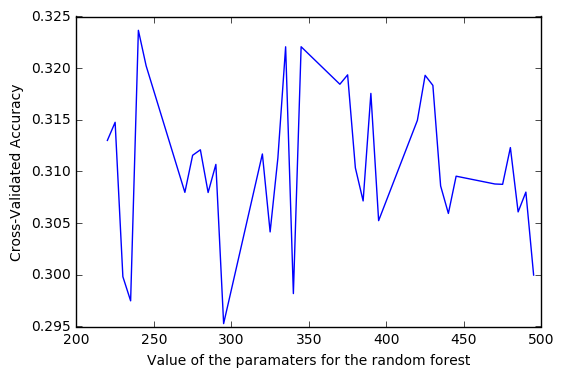

In [23]:
## PAS FACILE DE PLOTTER : les 2 parametres en meme temps sur les abscisses c'est galère...
param_display = []
for n,d in rf_param:
   param_display.append(n+d) 

plt.plot(param_display,rf_scores)
plt.xlabel('Value of the paramaters for the random forest')
plt.ylabel('Cross-Validated Accuracy')

idx_best = np.argmax(rf_scores)
print(np.max(rf_scores))
print(rf_param[idx_best])